# `HAH913E-2024-ECG_001.jpynb`: Read and plot ECG data

In this Jupyter notebook, we read and plot ECG data from a healthy subject.

## 1. Open an ECG file into the `ecg` variable
We want to read the file `ECG_hz.txt` from the `data` folder.  
We shall put the data into a variable named `ecg`.


### 1.1. Define the path to the ECG file

The path to the file is `data/ECG_hz.txt`, starting from the root of the project.  
However, the present notebook is located in the `notebooks` folder, so we need to go up one level to reach the `data` folder:
  1. go up one level: `../` 
  1. then, reach the `data` folder: `../data/`
  1. then, reach the file: `../data/ECG_hz.txt`

In [7]:
fNameECG = "/Users/verdianeouattara/Downloads/ECGu.txt"

However, if we `%run` this notebook from another notebook, the path is expected from the other notebook. So we need a way to define the path to the file in a way that is independent of the notebook that is running the present notebook.

In [8]:
# if the present working directory is the directory of this file, change the path to the project root
import os
if os.getcwd().endswith("notebooks"):
    os.chdir("..")

fNameECG = "/Users/verdianeouattara/Downloads/ECGu.txt"

### 1.2. Read the ecg file

In [9]:
import numpy as np 

ecg = np.genfromtxt(fNameECG, delimiter=' ')

# 2. Plot the content of the `egc` variable 

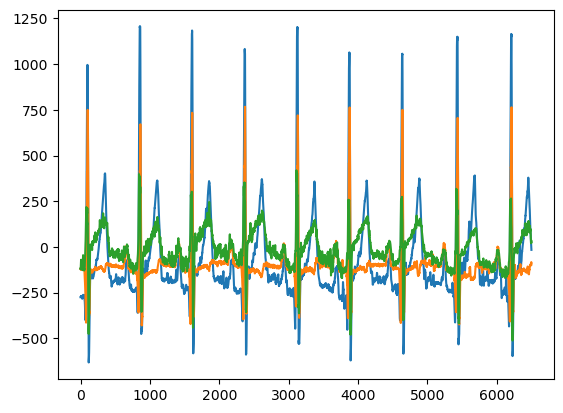

ecg_00.ipynb finished


In [10]:
import matplotlib.pyplot as plt 

plt.plot(ecg)
plt.show()

print("ecg_00.ipynb finished")

In [11]:
import pandas as pd 

ECG = pd.read_csv (fNameECG,sep= " ") 
print(ECG)

      -275.0\t  -119.0\t  -119.0\t.1  Unnamed: 3
0       -275.0    -119.0      -119.0         NaN
1       -275.0    -118.0      -121.0         NaN
2       -275.0    -121.0      -112.0         NaN
3       -273.0    -120.0      -105.0         NaN
4       -274.0    -124.0      -101.0         NaN
...        ...       ...         ...         ...
6494       3.0     -92.0        28.0         NaN
6495       1.0     -86.0        22.0         NaN
6496      -4.0     -83.0        21.0         NaN
6497      -9.0     -88.0        31.0         NaN
6498     -16.0     -96.0        33.0         NaN

[6499 rows x 4 columns]


In [12]:
ECG.columns= ['I', 'II','III','IV']
print(ECG)

          I     II    III  IV
0    -275.0 -119.0 -119.0 NaN
1    -275.0 -118.0 -121.0 NaN
2    -275.0 -121.0 -112.0 NaN
3    -273.0 -120.0 -105.0 NaN
4    -274.0 -124.0 -101.0 NaN
...     ...    ...    ...  ..
6494    3.0  -92.0   28.0 NaN
6495    1.0  -86.0   22.0 NaN
6496   -4.0  -83.0   21.0 NaN
6497   -9.0  -88.0   31.0 NaN
6498  -16.0  -96.0   33.0 NaN

[6499 rows x 4 columns]


In [13]:
ecg = ECG.drop("IV",axis=1)


In [14]:
print(ecg)

          I     II    III
0    -275.0 -119.0 -119.0
1    -275.0 -118.0 -121.0
2    -275.0 -121.0 -112.0
3    -273.0 -120.0 -105.0
4    -274.0 -124.0 -101.0
...     ...    ...    ...
6494    3.0  -92.0   28.0
6495    1.0  -86.0   22.0
6496   -4.0  -83.0   21.0
6497   -9.0  -88.0   31.0
6498  -16.0  -96.0   33.0

[6499 rows x 3 columns]


In [15]:
ecgI = ecg[['I']]
ecgII = ecg[['II']]
ecgIII= ecg[['III']]

Display of various ECG graphs

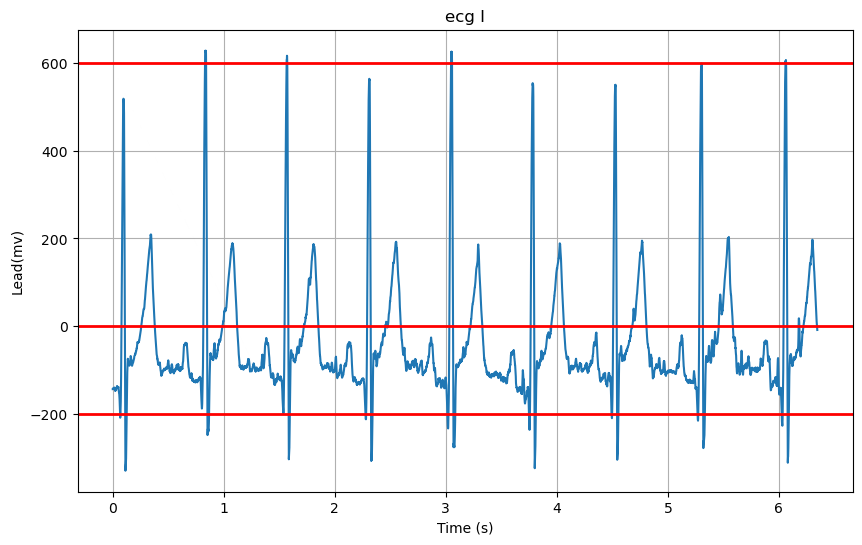

In [40]:
import matplotlib.pyplot as plt 

sampling_frequency = 1024  # Hz
ad_gain = 520e-6  

time = np.arange(len(ecgI)) / sampling_frequency
ecgI_mV = ecgI * (ad_gain * 1000) 
plt.figure(figsize=(10, 6)) 
plt.plot(time, ecgI_mV)
plt.title("ecg I")
plt.xlabel("Time (s)")
plt.ylabel("Lead(mv)")
plt.grid(True)
plt.axhline(y=600, color='red', linestyle='-', linewidth=2) 
plt.axhline(y=0, color='red', linestyle='-', linewidth=2)  
plt.axhline(y= -200, color='red', linestyle='-', linewidth=2) 
plt.show()







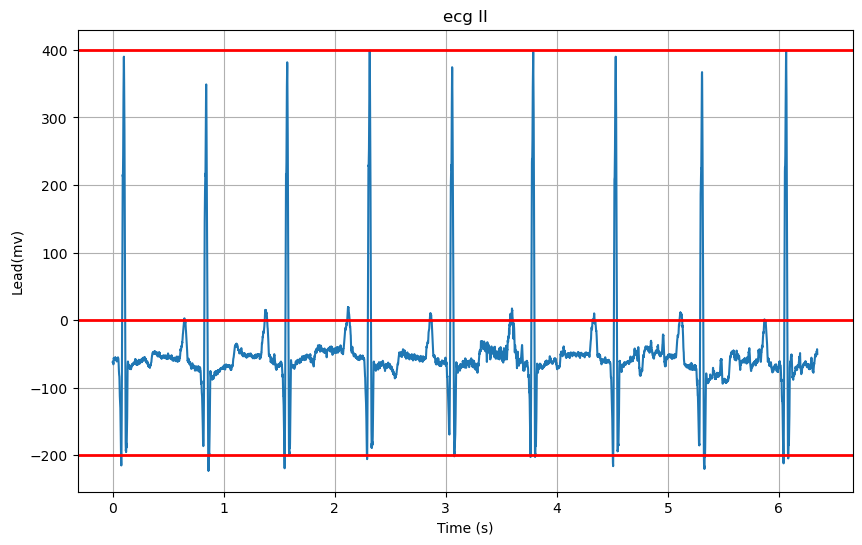

In [39]:
time = np.arange(len(ecgII)) / sampling_frequency
ecgII_mV = ecgII * (ad_gain * 1000)  
plt.figure(figsize=(10, 6))  
plt.plot(time, ecgII_mV)
plt.title("ecg II")
plt.xlabel("Time (s)")
plt.ylabel("Lead(mv)")
plt.grid(True)
plt.axhline(y=400, color='red', linestyle='-', linewidth=2) 
plt.axhline(y=0, color='red', linestyle='-', linewidth=2)  
plt.axhline(y= -200, color='red', linestyle='-', linewidth=2) 
plt.show()

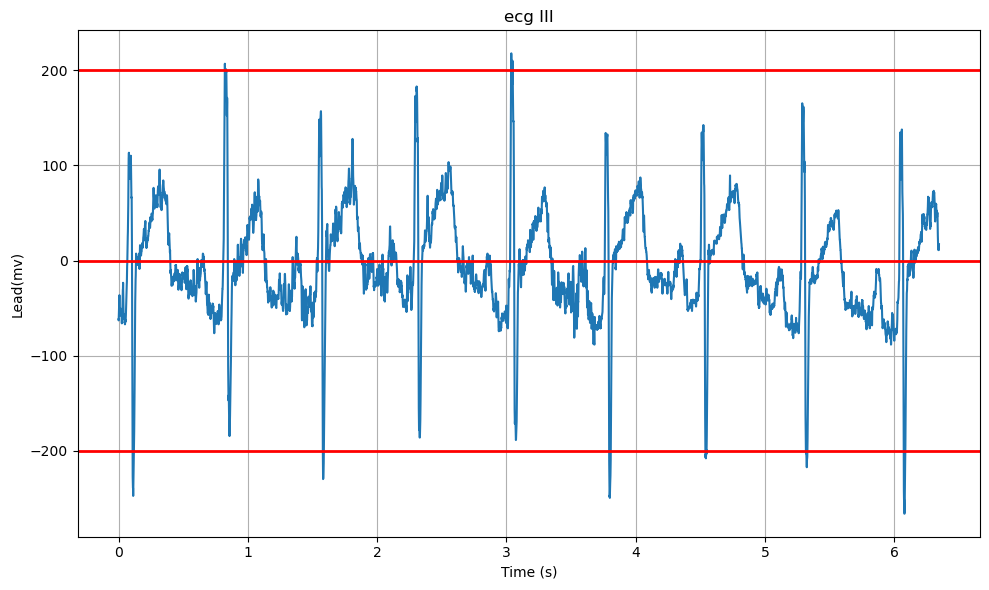

In [38]:
time = np.arange(len(ecgIII)) / sampling_frequency
ecgIII_mV = ecgIII * (ad_gain * 1000)  
plt.figure(figsize=(10, 6))
plt.plot(time, ecgIII_mV)
plt.xlabel("Time (s)")
plt.ylabel("Lead(mv)")
plt.title("ecg III")
plt.grid(True)
plt.axhline(y=200, color='red', linestyle='-', linewidth=2) 
plt.axhline(y=0, color='red', linestyle='-', linewidth=2)  
plt.axhline(y= -200, color='red', linestyle='-', linewidth=2) 
plt.tight_layout()
plt.show()

Answer the following questions:

Answers :  

1. **Does this ECG look correctly scaled?**

   No, the ECG is not correctly scaled. The Y-axis shows values from -200 mV to +600 mV, which is far too high for a typical ECG. Normal ECG signals range from -1 mV to +1 mV.

2. **Is this a normal ECG?**

   No, this does not appear to be a normal ECG. The waveform looks irregular and noisy, with unusually high peaks. A normal ECG has distinct patterns (P wave, QRS complex, T wave), which are not clearly visible here.